# Data loading

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv
/kaggle/input/atis-airlinetravelinformationsystem/atis_intents.csv
/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_test.csv


## Installing requirements

In [3]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
import string

In [4]:
# Problem with Kaggle infra when using wordnet. Have to unzip manually.
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

# EDA

In [5]:
df = pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv",names=["intent","query"],header=None)

In [8]:
df.head()

,intent,query
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


In [6]:
df["intent"].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airline', 'atis_abbreviation',
       'atis_quantity'], dtype=object)

<AxesSubplot:ylabel='query'>

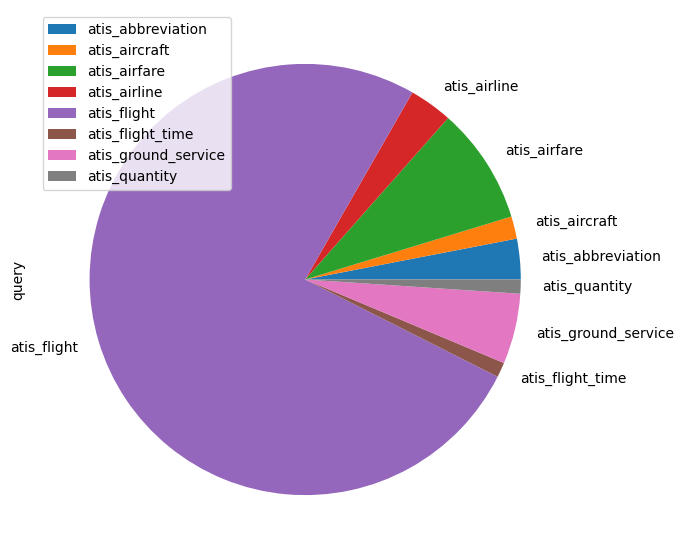

In [11]:
df_class_count = df.groupby(by='intent').count()
df_class_count.plot.pie(y="query", figsize=(10,7))

# First approach: ML models

## Text preprocessing

In [12]:
df_testing = df.copy()

In [13]:
import string

def remove_punctuation(text):
    punct_free = "".join([i for i in text if i not in string.punctuation])
    return punct_free

In [14]:
df_testing["punct_free"] = df_testing["query"].apply(lambda x: remove_punctuation(x))
df_testing.head()

,intent,query,punct_free
0,atis_flight,i want to fly from boston at 838 am and arriv...,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...,round trip fares from pittsburgh to philadelp...


In [ ]:
from nltk.tokenize import TreebankWordTokenizer

def tokenize(text):
    tokenizer = TreebankWordTokenizer()
    tokenized = tokenizer.tokenize(text)
    return tokenized

In [ ]:
df_testing["tokenized"] = df_testing["punct_free"].apply(lambda x: tokenize(x))
df_testing.head()

In [ ]:
import nltk

def remove_stopwords(text):
    nltk_stop_words = nltk.corpus.stopwords.words("english")
    stop_words = nltk_stop_words + ["im","id"]
    output = [i for i in text if i not in stop_words]
    
    return output

In [ ]:
df_testing["no_stopwords"] = df_testing["tokenized"].apply(lambda x: remove_stopwords(x))
df_testing.head()

In [ ]:
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(lemm_text)


In [ ]:
# Problem with Kaggle infra when using wordnet. Have to unzip manually.
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora

In [ ]:
df_testing["lemmatized"] = df_testing["no_stopwords"].apply(lambda x:lemmatize(x))
df_testing.head()

In [15]:

import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
import string

def preprocess_atis(df):
    df["query"] = df["query"].apply(lambda x: _remove_punctuation(x))
    df["query"] = df["query"].apply(lambda x: _tokenize(x))
    df["query"] = df["query"].apply(lambda x: _remove_stopwords(x))
    df["query"] = df["query"].apply(lambda x: _lemmatize(x))
    
    return df


def _remove_punctuation(text):
    punct_free = "".join([i for i in text if i not in string.punctuation])
    return punct_free

def _tokenize(text):
    tokenizer = TreebankWordTokenizer()
    tokenized = tokenizer.tokenize(text)
    return tokenized

def _remove_stopwords(text):
    nltk_stop_words = nltk.corpus.stopwords.words("english")
    stop_words = nltk_stop_words + ["im","id"]
    output = [i for i in text if i not in stop_words]
    
    return output

def _lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return " ".join(lemm_text)




## Data Split

In [115]:
intents = ['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airline', 'atis_abbreviation',
       'atis_quantity']
intent_dict = {intent:i+1 for i,intent in enumerate(intents)}

In [116]:
df_train = pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv",names=["intent","query"],header=None)
df_test = pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_test.csv",names=["intent","query"],header=None)

df_train_preprocessed = preprocess_atis(df_train)
df_test_preprocessed = preprocess_atis(df_test)

X_train = df_train_preprocessed["query"]
X_test = df_test_preprocessed["query"]

y_train = df_train_preprocessed["intent"].apply(lambda x: intent_dict[x])
y_test = df_test_preprocessed["intent"].apply(lambda x: intent_dict[x])

## TF-IDF vectorization

In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Applying Naive Bayes classifier

In [118]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

y_pred = nb_clf.predict(X_test_tfidf)

score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=intents))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

accuracy:   0.892
                     precision    recall  f1-score   support

        atis_flight       0.88      1.00      0.94       632
   atis_flight_time       0.00      0.00      0.00         1
       atis_airfare       0.92      0.23      0.37        48
      atis_aircraft       0.78      0.78      0.78         9
atis_ground_service       1.00      0.97      0.99        36
       atis_airline       0.80      0.11      0.19        38
  atis_abbreviation       1.00      0.79      0.88        33
      atis_quantity       0.00      0.00      0.00         3

           accuracy                           0.89       800
          macro avg       0.67      0.48      0.52       800
       weighted avg       0.89      0.89      0.86       800

confusion matrix:
[[631   0   1   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [ 37   0  11   0   0   0   0   0]
 [  2   0   0   7   0   0   0   0]
 [  1   0   0   0  35   0   0   0]
 [ 34   0   0   0   0   4   0   0]
 [  7   0   0   0  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


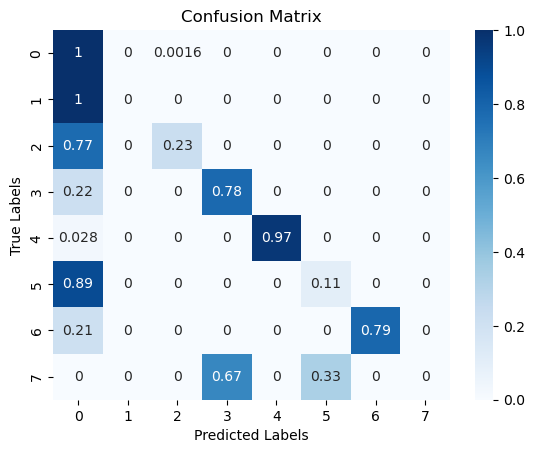

In [122]:
# generate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred,normalize='true')

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

## Applying SVM classifier

In [123]:
from sklearn.svm import SVC
from sklearn import metrics

svm_clf = SVC()
svm_clf.fit(X_train_tfidf, y_train)

y_pred_svm = svm_clf.predict(X_test_tfidf)

score1 = metrics.accuracy_score(y_test, y_pred_svm)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred_svm,
                                            target_names=intents))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_svm))

print('------------------------------')

accuracy:   0.960
                     precision    recall  f1-score   support

        atis_flight       0.97      0.98      0.98       632
   atis_flight_time       0.00      0.00      0.00         1
       atis_airfare       0.90      0.96      0.93        48
      atis_aircraft       0.64      1.00      0.78         9
atis_ground_service       1.00      0.97      0.99        36
       atis_airline       1.00      0.84      0.91        38
  atis_abbreviation       1.00      0.79      0.88        33
      atis_quantity       0.00      0.00      0.00         3

           accuracy                           0.96       800
          macro avg       0.69      0.69      0.68       800
       weighted avg       0.96      0.96      0.96       800

confusion matrix:
[[620   0   5   3   0   0   0   4]
 [  1   0   0   0   0   0   0   0]
 [  2   0  46   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0]
 [  1   0   0   0  35   0   0   0]
 [  6   0   0   0   0  32   0   0]
 [  7   0   0   0  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


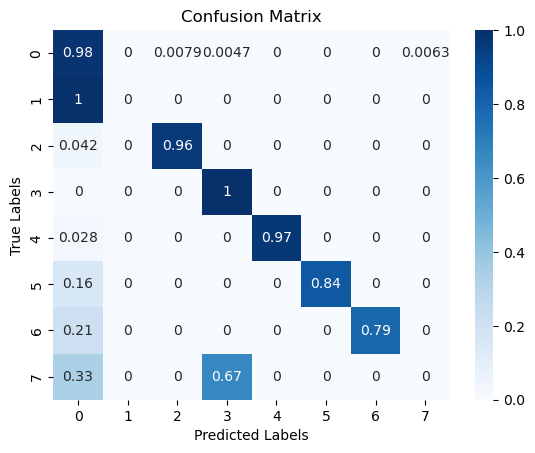

In [124]:
# generate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_svm,normalize='true')

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

## Applying logistic regression classifier

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train_tfidf, y_train)

y_pred_logreg = logreg_clf.predict(X_test_tfidf)

score1 = metrics.accuracy_score(y_test, y_pred_logreg)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred_logreg,
                                            target_names=intents))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_logreg))

print('------------------------------')

accuracy:   0.965
                     precision    recall  f1-score   support

        atis_flight       0.96      0.99      0.98       632
   atis_flight_time       0.00      0.00      0.00         1
       atis_airfare       0.96      0.92      0.94        48
      atis_aircraft       0.82      1.00      0.90         9
atis_ground_service       1.00      0.97      0.99        36
       atis_airline       1.00      0.76      0.87        38
  atis_abbreviation       1.00      0.79      0.88        33
      atis_quantity       0.67      0.67      0.67         3

           accuracy                           0.96       800
          macro avg       0.80      0.76      0.78       800
       weighted avg       0.96      0.96      0.96       800

confusion matrix:
[[627   0   2   2   0   0   0   1]
 [  1   0   0   0   0   0   0   0]
 [  4   0  44   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0]
 [  1   0   0   0  35   0   0   0]
 [  9   0   0   0   0  29   0   0]
 [  7   0   0   0  

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


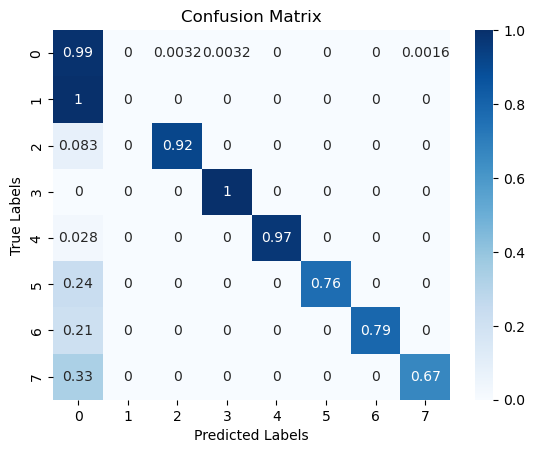

In [126]:
# generate the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_logreg,normalize='true')

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()

# Second approach: DL models

## Installing requirements

We will be using PyTorch alongside the HuggingFace library.

In [22]:
import torch

In [56]:
from huggingface_hub import notebook_login

notebook_login()

## Converting to PyTorch dataset

In [67]:
df_train = pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_train.csv",names=["intent","query"],header=None)

In [66]:
intents = ['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airline', 'atis_abbreviation',
       'atis_quantity']

id2label = {i: intent for i, intent in enumerate(intents)}
label2id = {intent: i for i, intent in enumerate(intents)}

In [69]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

df_train = df_train.rename(columns={"intent":"label","query":"text"})

df_train["label"] = df_train["label"].apply(lambda x: label2id[x])

train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)

# reset the index of the training and validation dataframes
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# converting dataframes to PyTorch datasets
train_dataset = Dataset.from_pandas(train_df[["text","label"]])
val_dataset = Dataset.from_pandas(val_df[["text","label"]])

## Preprocess

In [73]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

tokenized_atis_train = train_dataset.map(preprocess_function)
tokenized_atis_val = val_dataset.map(preprocess_function)

  0%|          | 0/3867 [00:00<?, ?ex/s]

  0%|          | 0/967 [00:00<?, ?ex/s]

In [74]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


## Evaluate

In [60]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.2 MB/s eta 0:00:00


In [82]:
from sklearn.metrics import classification_report

import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    report = classification_report(labels, predictions, digits=4, output_dict=True)
    return {
        "accuracy": report["accuracy"],
        "class_0_f1": report["0"]["f1-score"],
        "class_1_f1": report["1"]["f1-score"],
        "class_2_f1": report["2"]["f1-score"],
        "class_3_f1": report["3"]["f1-score"],
        "class_4_f1": report["4"]["f1-score"],
        "class_5_f1": report["5"]["f1-score"],
        "class_6_f1": report["6"]["f1-score"],
        "class_7_f1": report["7"]["f1-score"],
    }

## Train

In [75]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

atis_model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=8, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'pre_classifi

In [81]:
training_args = TrainingArguments(
    output_dir="atis_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end = True,
    push_to_hub=True,
)

trainer = Trainer(
    model=atis_model,
    args=training_args,
    train_dataset=tokenized_atis_train,
    eval_dataset=tokenized_atis_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/kaggle/working/atis_model is already a clone of https://huggingface.co/chrisahn99/atis_model. Make sure you pull the latest changes with `repo.git_pull()`.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.045535,0.991727
2,No log,0.047797,0.993795


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

TrainOutput(global_step=484, training_loss=0.01083816575609948, metrics={'train_runtime': 724.4506, 'train_samples_per_second': 10.676, 'train_steps_per_second': 0.668, 'total_flos': 47379757507776.0, 'train_loss': 0.01083816575609948, 'epoch': 2.0})

In [83]:
training_args = TrainingArguments(
    output_dir="atis_model",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end = True,
    push_to_hub=True,
)

trainer = Trainer(
    model=atis_model,
    args=training_args,
    train_dataset=tokenized_atis_train,
    eval_dataset=tokenized_atis_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/kaggle/working/atis_model is already a clone of https://huggingface.co/chrisahn99/atis_model. Make sure you pull the latest changes with `repo.git_pull()`.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:395: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,Class 0 F1,Class 1 F1,Class 2 F1,Class 3 F1,Class 4 F1,Class 5 F1,Class 6 F1,Class 7 F1
1,No log,0.059789,0.990693,0.996540,0.962963,0.978723,0.947368,0.990099,0.950820,0.958904,1.000000
2,No log,0.062038,0.991727,0.997238,0.962963,0.978495,0.947368,0.990099,0.966667,0.958904,1.000000


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

TrainOutput(global_step=484, training_loss=0.006817742320131664, metrics={'train_runtime': 763.9327, 'train_samples_per_second': 10.124, 'train_steps_per_second': 0.634, 'total_flos': 47379757507776.0, 'train_loss': 0.006817742320131664, 'epoch': 2.0})

## Seeing results for test set

In [109]:
df_test = pd.read_csv("/kaggle/input/atis-airlinetravelinformationsystem/atis_intents_test.csv",names=["intent","query"],header=None)
df_test.head()

,intent,query
0,atis_flight,i would like to find a flight from charlotte ...
1,atis_airfare,on april first i need a ticket from tacoma to...
2,atis_flight,on april first i need a flight going from pho...
3,atis_flight,i would like a flight traveling one way from ...
4,atis_flight,i would like a flight from orlando to salt la...


In [107]:
tokenizer = AutoTokenizer.from_pretrained("chrisahn99/atis_model")
model = AutoModelForSequenceClassification.from_pretrained("chrisahn99/atis_model")

In [98]:
intents = ['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airline', 'atis_abbreviation',
       'atis_quantity']
intent_dict = {intent:i+1 for i,intent in enumerate(intents)}

In [110]:
df_test = df_test.rename(columns={"intent":"label","query":"text"})
df_test["label"] = df_test["label"].apply(lambda x: label2id[x])

# tokenize the test data using the tokenizer
test_encodings = tokenizer(list(df_test['text']), truncation=True, padding=True)

# convert the encodings to PyTorch tensors
test_dataset = torch.utils.data.TensorDataset(
    torch.tensor(test_encodings['input_ids']),
    torch.tensor(test_encodings['attention_mask'])
)

# set the model to evaluation mode
model.eval()

# pass the test data through the model to get predictions
with torch.no_grad():
    outputs = model(
        input_ids=test_dataset.tensors[0],
        attention_mask=test_dataset.tensors[1]
    )
    logits = outputs.logits

# convert the logits to probabilities and get the predicted labels
probabilities = torch.softmax(logits, dim=1).tolist()
predicted_labels = logits.argmax(dim=1).tolist()

# get the true labels from the test DataFrame
true_labels = list(df_test['label'])

# generate a classification report for the predicted labels
report = classification_report(true_labels, predicted_labels)

# print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       632
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        33
           7       0.43      1.00      0.60         3

    accuracy                           0.99       800
   macro avg       0.93      1.00      0.95       800
weighted avg       1.00      0.99      1.00       800



In [111]:
print("confusion matrix:")
print(metrics.confusion_matrix(true_labels, predicted_labels))

confusion matrix:
[[628   0   0   0   0   0   0   4]
 [  0   1   0   0   0   0   0   0]
 [  0   0  48   0   0   0   0   0]
 [  0   0   0   9   0   0   0   0]
 [  0   0   0   0  36   0   0   0]
 [  0   0   0   0   0  38   0   0]
 [  0   0   0   0   0   0  33   0]
 [  0   0   0   0   0   0   0   3]]


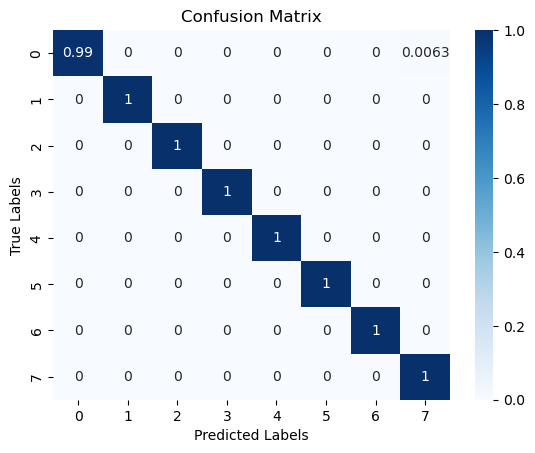

In [114]:

import seaborn as sns
import matplotlib.pyplot as plt

# generate the confusion matrix
cm = metrics.confusion_matrix(true_labels, predicted_labels,normalize='true')

# plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

# set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# show the plot
plt.show()